# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


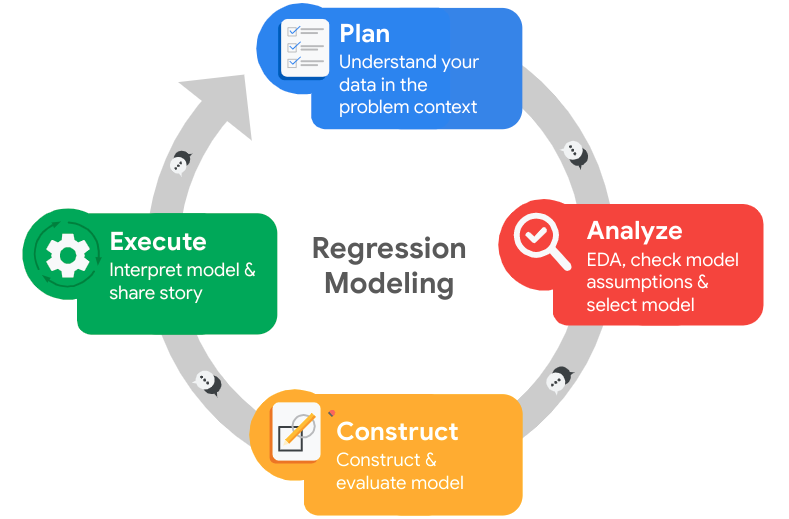

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The stakeholders for this scenario would be the human resources unit of Sailfort Motors. I am trying to solve which factors lead to a high turnover rate among the employees in Sailfort Motors by analyzing the survey data and come up with ideas on how to increase retention. 

The leadership team said it's up to me, but in this scenario I will be doing two models:
1. logistic regression model
2. decision tree classification model

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [77]:
# Import packages
### YOUR CODE HERE ### 

# Essentials
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in data frames. 
pd.set_option('display.max_columns', None)

# Modelling from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Tree tuning and data splitting
from sklearn.model_selection import GridSearchCV, train_test_split

# Metrics - this is VERY important
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###
df0.columns
# Misspellings and inconsistency.

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
# all columns that have misspellings and not converted to lower case will be renamed.
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'Work_accident': "work_accident",
                            'Department': 'department',
                            'average_montly_hours': 'average_monthly_hours',
                            'time_spend_company': 'tenure_years'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure_years', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()
# Good there are none.

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure_years             0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()
# VERY CONCERNING. 3008 of 14998 are duplicated.

3008

In [13]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(10)
# Question mark? Duplicated or no?

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure_years,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure_years,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

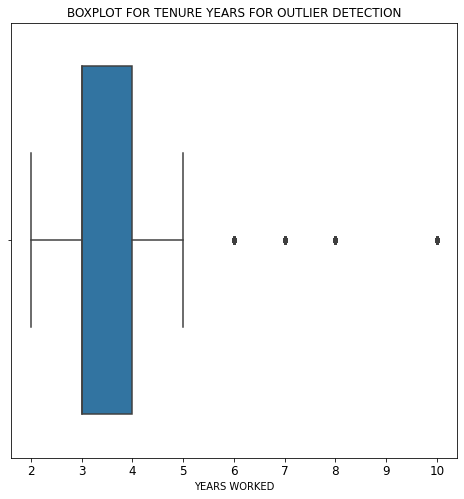

In [17]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize = (8, 8))
plt.title('BOXPLOT FOR TENURE YEARS FOR OUTLIER DETECTION', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['tenure_years'])
plt.xlabel('YEARS WORKED')
plt.show()

In [21]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Compute the Q1 and Q3 and IQR
q1ty = df1['tenure_years'].quantile(0.25)
q3ty = df1['tenure_years'].quantile(0.75)
iqrty = q3ty - q1ty

# Define limits
upperlimitty = q3ty + 1.5 * iqrty
lowerlimitty = q1ty - 1.5 * iqrty
print("BELOW THIS THRESHOLD IT'S A LOWER OUTLIER: ", lowerlimitty)
print("ABOVE THIS THRESHOLD IT'S A HIGHER OUTLIER: ", upperlimitty)

# Determine the number of outliers
outliersinty = df1[(df1['tenure_years'] > upperlimitty) | (df1['tenure_years'] < lowerlimitty)]
print('NUMBER OF ROWS ROWS IN THE HR DATA THAT ARE OUTLEIRS BASED ON TENURE: ', len(outliersinty))

BELOW THIS THRESHOLD IT'S A LOWER OUTLIER:  1.5
ABOVE THIS THRESHOLD IT'S A HIGHER OUTLIER:  5.5
NUMBER OF ROWS ROWS IN THE HR DATA THAT ARE OUTLEIRS BASED ON TENURE:  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [22]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

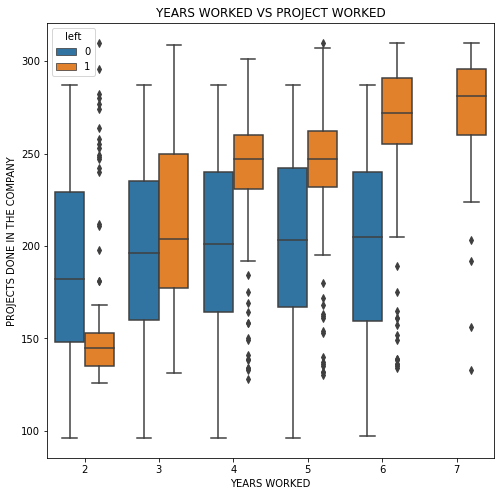

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###

# PLOT 1: Boxplot on comparing monthly hours vs number of projects
plt.figure(figsize = (8, 8))
plt.title('YEARS WORKED VS PROJECT WORKED')
sns.boxplot(data = df1, x = 'number_project', y = 'average_monthly_hours', hue = 'left')
plt.xlabel('YEARS WORKED')
plt.ylabel('PROJECTS DONE IN THE COMPANY')
plt.show()

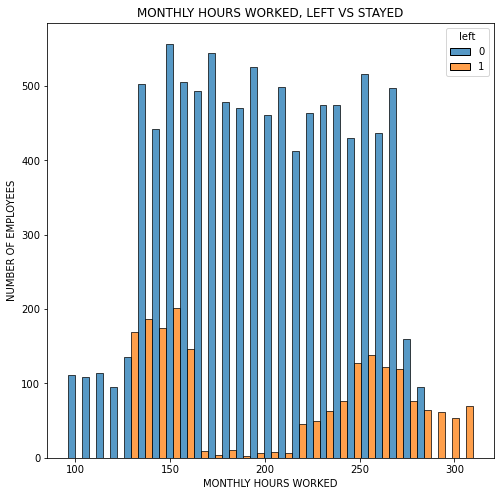

In [56]:
# Create a plot as needed
### YOUR CODE HERE ###

# PLOT 2: Monthly hours worked, comparing people stayed vs left
plt.figure(figsize = (8, 8))
plt.title('MONTHLY HOURS WORKED, LEFT VS STAYED')
sns.histplot(data = df1, x = 'average_monthly_hours', hue = 'left', multiple = 'dodge')
plt.xlabel('MONTHLY HOURS WORKED')
plt.ylabel('NUMBER OF EMPLOYEES')
plt.show()

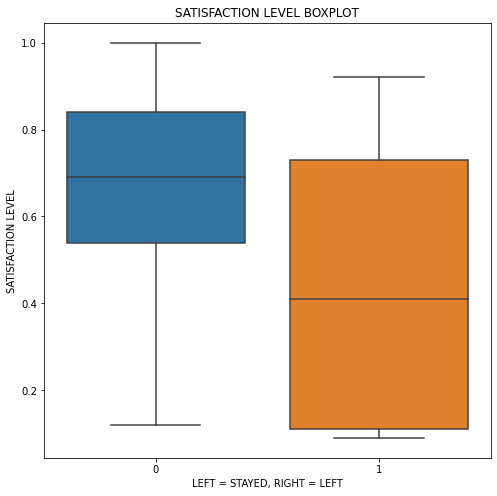

In [39]:
# Create a plot as needed
### YOUR CODE HERE ###

# PLOT 3: Satisfaction level boxplot
plt.figure(figsize = (8, 8))
plt.title('SATISFACTION LEVEL BOXPLOT')
sns.boxplot(data = df1, x = 'left', y = 'satisfaction_level')
plt.xlabel('LEFT = STAYED, RIGHT = LEFT')
plt.ylabel('SATISFACTION LEVEL')
plt.show()

In [55]:
print('nothing to see here')

nothing to see here


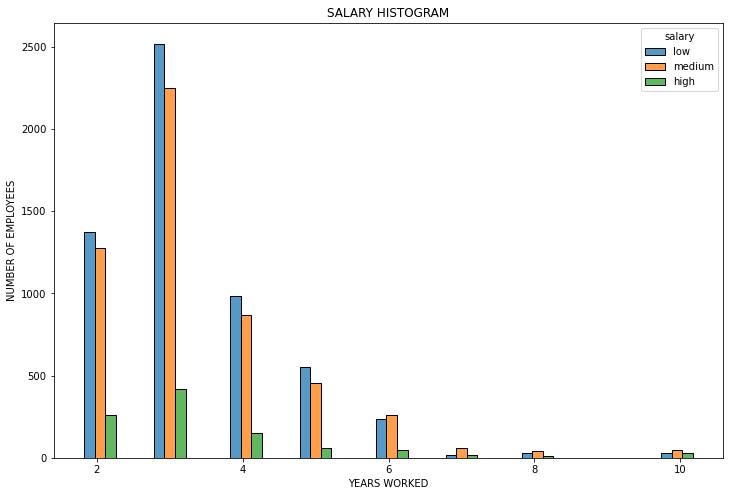

In [45]:
# PLOT 4: Salary Histogram by tenure length
plt.figure(figsize = (12, 8))
plt.title('SALARY HISTOGRAM')
sns.histplot(data = df1, x = 'tenure_years', hue = 'salary', hue_order = ['low', 'medium', 'high'],
            multiple = 'dodge', shrink = 5)
plt.xlabel('YEARS WORKED')
plt.ylabel('NUMBER OF EMPLOYEES')
plt.show()

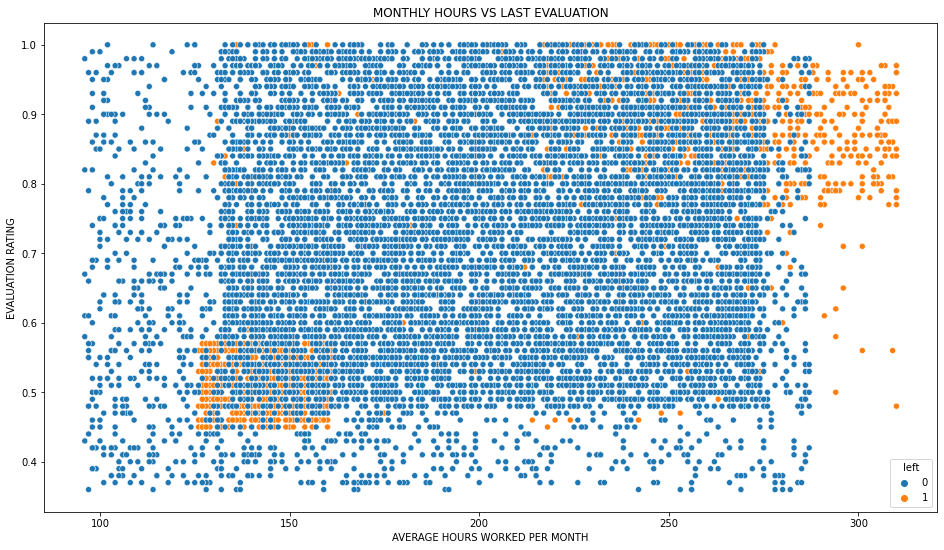

In [47]:
# PLOT 5: Monthly hours vs evaluation score scatter plot
plt.figure(figsize = (16, 9))
plt.title('MONTHLY HOURS VS LAST EVALUATION')
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left')
plt.xlabel('AVERAGE HOURS WORKED PER MONTH')
plt.ylabel('EVALUATION RATING')
plt.show()

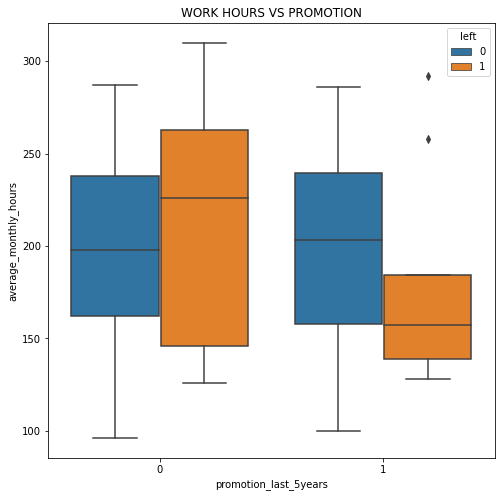

In [53]:
# PLOT 6: Does work hours lead to promotion or people ditching?
plt.figure(figsize = (8, 8))
plt.title('WORK HOURS VS PROMOTION')
sns.boxplot(data = df1, x = 'promotion_last_5years', y = 'average_monthly_hours', hue = 'left')
plt.show()

Text(0.5, 1.0, 'CORRELATION HEATMAP')

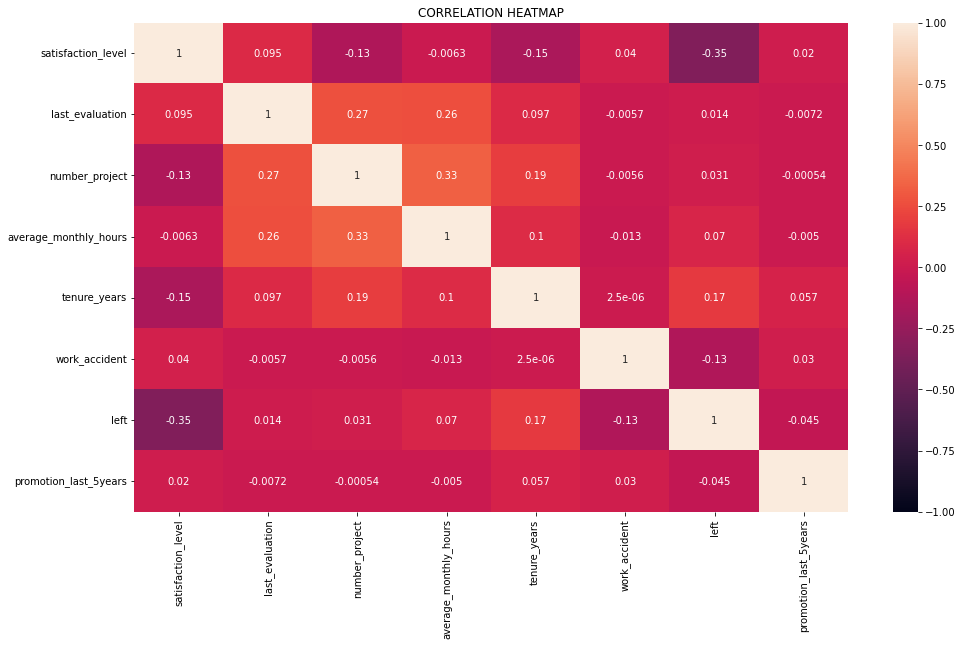

In [54]:
# PLOT 7: Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(),  vmin=-1, vmax=1, annot=True)
heatmap.set_title('CORRELATION HEATMAP')

### Insights

Plot 1: More projects worked, more likely to leave.
Plot 2: People who work 300 hours a month is also more likely to leave.
Plot 3: The people who stayed have higher satisfaction level.
Plot 4: There is no correlation between salary level and years worked. 
Plot 5: The scatterplot is all over the place, no easy correlation reading, but there are people who leave have high ratings and high work hours.
Plot 6: People who did not get promoted are more likely to leave, while people do get promoted are less likely to leave.
Plot 7: There are no strong multicollinearity.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

I need to predict the outcome variable (leaving the company) using the independent variables. 

### Identify the types of models most appropriate for this task.

Since leaving variable is binary, then for regression modelling it's logistic regression, and for machine learning it's supervised classifications, such as decision trees. 

In this project I will be doing a logistic regression model and a decision tree. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [57]:
# MODEL 1: Logistic Regression

# Pre-processing
df2 = df1.copy()

df2['salary'] = df2['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df2 = pd.get_dummies(df2, drop_first = False)

df2.head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure_years,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
# Confirm the salary numbers match up

print(df1['salary'].value_counts())
print()
print(df2['salary'].value_counts())

low       5740
medium    5261
high       990
Name: salary, dtype: int64

0    5740
1    5261
2     990
Name: salary, dtype: int64


In [62]:
# Remove outliers in tenure, MUST do before building the model. 

df3 = df2[(df2['tenure_years'] > lowerlimitty) & (df2['tenure_years'] < upperlimitty)]
print(df2.shape)
print(df3.shape)

(11991, 19)
(11167, 19)


In [65]:
# Set up the data for logistic regression
y = df3['left']
X = df3.drop('left', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 607)

In [66]:
# Instantiate
logreg = LogisticRegression(random_state = 607, max_iter = 500).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [90]:
# Results of the Logistic Regression Model
target_names = ['PREDICTED TO BE NOT LEAVING', 'PREDICTED TO BE LEAVING']
print(classification_report(y_test, y_pred, target_names = target_names))

# The f1 score is 0.8, let's see if it's better to do it with the decision trees.

                             precision    recall  f1-score   support

PREDICTED TO BE NOT LEAVING       0.86      0.94      0.90      2321
    PREDICTED TO BE LEAVING       0.44      0.24      0.31       471

                   accuracy                           0.82      2792
                  macro avg       0.65      0.59      0.60      2792
               weighted avg       0.79      0.82      0.80      2792



In [72]:
# For decision trees, there are no outlier assumptions, so no cutting data.
X2 = df2.drop('left', axis = 1)
y2 = df2['left']
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 607)

In [78]:
# Instantiate. 
dt = DecisionTreeClassifier(random_state = 607)

# Hyperparameters
cv_params = {'max_depth': [4, 5, 6, 7, 8],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [3, 4, 5, 6, 7]}

# Scoring
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']

# GridSearch
dt1 = GridSearchCV(dt, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [79]:
# Fit the decision tree
dt1.fit(X2_train, y2_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=607,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                        

In [80]:
# Get the best parameters!
dt1.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}

In [81]:
# Get best score!
dt1.best_score_
# This is REALLY GOOD. 0.976.

0.9758962674962572

In [87]:
# Make a report
def report(model: str, obj):
    '''
    INPUT: model for output table as model, a fit GridSearchCV as obj.
    OUTPUT: a pandas dataframe that reports the metric score of the BEST mean scores across all validations.
    '''
    # Dictionary that maps input to GridSearchCV names
    metrics = {'auc': 'mean_test_roc_auc',
               'precision': 'mean_test_precision',
               'recall': 'mean_test_recall',
               'f1': 'mean_test_f1',
               'accuracy': 'mean_test_accuracy'}
    
    # Get all the results
    cv_results = pd.DataFrame(obj.cv_results_)
    
    # Get the best results
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create the report
    report = pd.DataFrame({'MODEL': [model],
                          'PRECISION SCORE': [precision],
                          'RECALL SCORE': [recall],
                          'F1 SCORE': [f1],
                          'ACCURACY SCORE': [accuracy],
                          'AUC SCORE': [auc]
                        })
    
    # Return the report
    return report
  


In [88]:
# Get the decision tree report
dtreport = report('DECISION TREE MODEL', dt1)
dtreport

,MODEL,PRECISION SCORE,RECALL SCORE,F1 SCORE,ACCURACY SCORE,AUC SCORE
0,DECISION TREE MODEL,0.970249,0.919907,0.944327,0.981731,0.975896


In [96]:
# Get the Gini importances for decision tree.
dt1_importances = pd.DataFrame(dt1.best_estimator_.feature_importances_, 
                                 columns = ['gini_importance'], 
                                 index = X2.columns)
dt1_importances = dt1_importances[dt1_importances['gini_importance'] != 0]
dt1_importances
# It looks like satisfaction level, last evaluation, tenure years, number of project worked are important metrics.

,gini_importance
satisfaction_level,0.556154
last_evaluation,0.138959
number_project,0.107401
average_monthly_hours,0.044235
tenure_years,0.153076
department_accounting,0.000174


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The two models built: one is the obvious winner.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

SCORES ON THE TEST SETS:

LOGISTIC REGRESSION:
Precision score: 79%
Recall score: 82%
Accuracy score: 82%
F1 score: 80%
With a not-so-encouraging ~30% result in the prediction of leaving. 

DECISION TREE:
Precision score: 97%
Recall score: 92%
Accuracy score: 98%
F1 score: 94%
AUC score: 98%

Obviously the decision tree outperforms the logistic regression model. 

### Conclusion, Recommendations, Next Steps

The model shows that the satisfaction rates of employees are the main reason why the rates are elevated. Lower satisfaction rates meaning more people will leave. 

Recommendations for the company:
- Do not overwork employees. Compensate employers accordingly should they need overtime.
- Give a more fair promotion criterion and evaluation scores. They should not be reserved for the "most hardworking" people by quantity (hours worked), but rather by working quality. Quality over quantity, that's the old saying. 
- Hold discussions about work culture in specific contexts. 

Next steps:

Do more frequent checks/surveys on employer satisfaction. Therefore the bigger picture could get analyzed. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.